In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install unidecode


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/anthems.csv', encoding='utf-8')
data.columns = map(str.lower, data.columns)

continents = ['Europe', 'South_America', 'North_America','Asia','Africa','Oceania']
data = data.loc[data['continent'].isin(continents)]
data.head()

,country,alpha-2,alpha-3,continent,anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [ ]:
corpus = data['anthem'].tolist()
corpus[18][0:500]

"O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂ\x81rpÃƒÂ¡d our hero's descendants Will root and bloom For us on the plains "

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
#noise reduction
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord


In [ ]:
def processCorpus(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/data/countries.txt')]
    nationalities_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/data/nationalities.txt')]
    other_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/data/stopwords_scrapmaker.txt')]

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, countries_list)
        listOfTokens = removeWords(listOfTokens, nationalities_list)
        listOfTokens = removeWords(listOfTokens, other_words)

        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.stem import SnowballStemmer

def processCorpus(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/data/countries.txt')]
    nationalities_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/data/nationalities.txt')]

    processed_corpus = []  # Define processed_corpus before processing

    for document in corpus:
        # Your processing logic here
        processed_document = process_document(document, stopwords, param_stemmer, countries_list, nationalities_list)
        processed_corpus.append(processed_document)

    return processed_corpus

def process_document(document, stopwords, param_stemmer, countries_list, nationalities_list):
    # Your document processing logic here
    processed_document = document  # For now, just return the document as it is
    return processed_document

language = 'english'
corpus = processCorpus(corpus, language)
print(corpus[18][0:460])  # Assuming you want to print the processed text


O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂrpÃƒÂ¡d our hero's descendants W


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming corpus is already defined and processed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
print(final_df.T.nlargest(190, 0))  # Print the top 190 TF-IDF scores


190 rows
                0         1        2         3         4         5    6    \
albania    0.233911  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
sacred     0.212188  0.000000  0.00000  0.000000  0.069756  0.000000  0.0   
for        0.208532  0.167358  0.09638  0.065758  0.088141  0.151652  0.0   
he         0.202459  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
himself    0.187685  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
...             ...       ...      ...       ...       ...       ...  ...   
ambitious  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
america    0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
american   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
americas   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
amidst     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   

                7    8    9    ...       180       181      182  1

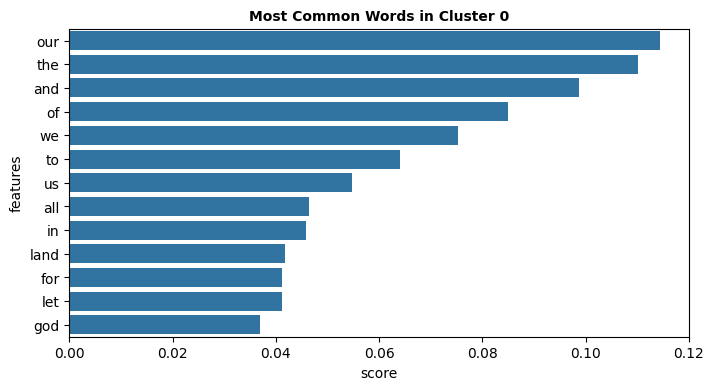

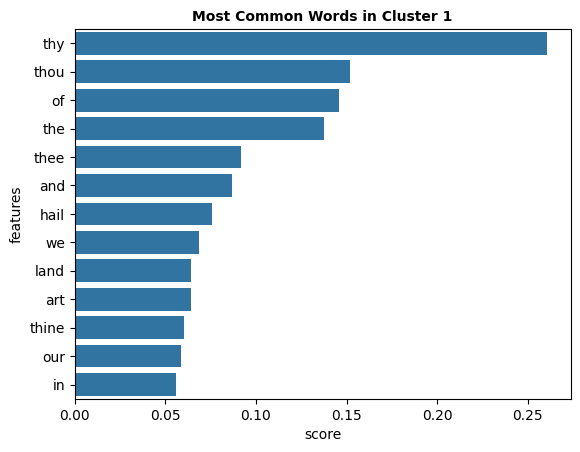

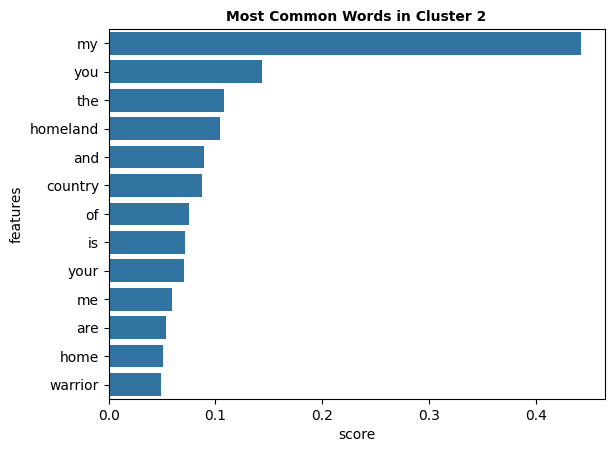

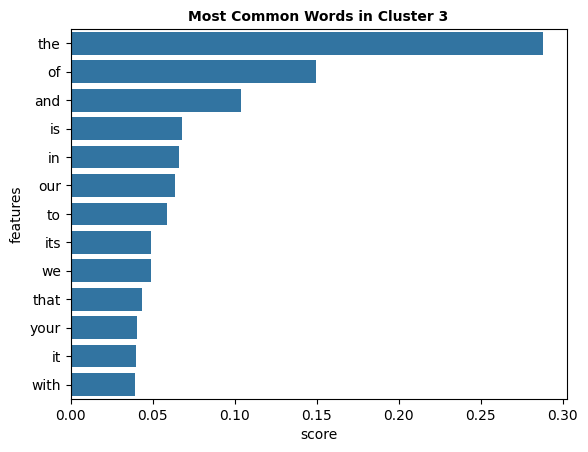

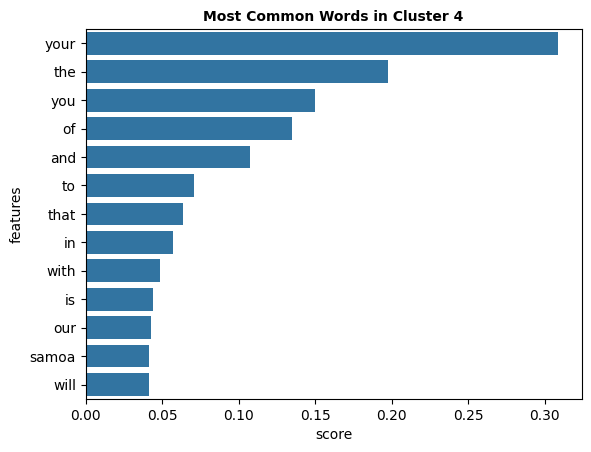

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_Hierarchical(max_k, data):
    hierarchical_results = dict()
    for k in range(2, max_k):
        hierarchical = AgglomerativeClustering(n_clusters=k)
        hierarchical.fit(data)
        hierarchical_results[k] = hierarchical
    return hierarchical_results

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    dfs = []
    for cluster in range(max(prediction) + 1):
        id_temp = np.where(prediction == cluster)  # indices of documents in cluster
        x_means = np.mean(tf_idf_array[id_temp], axis=0)  # returns average score across cluster
        features = np.array(vectorizer.get_feature_names_out())  # Getting feature names from the vectorizer
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top n_feats scores
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns=['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x='score', y='features', orient='h', data=dfs[i][:n_feats])
        plt.show()

# Running Hierarchical Clustering
k = 8
hierarchical_results = run_Hierarchical(k, final_df)

# Using the best result
best_result = 5
hierarchical = hierarchical_results.get(best_result)

# Predicting clusters
final_df_array = final_df.to_numpy()
prediction = hierarchical.labels_

# Getting top features for each cluster
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)

# Plotting top features for each cluster
plotWords(dfs, 13)


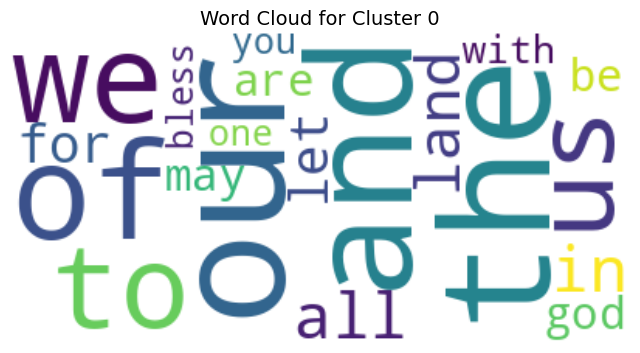

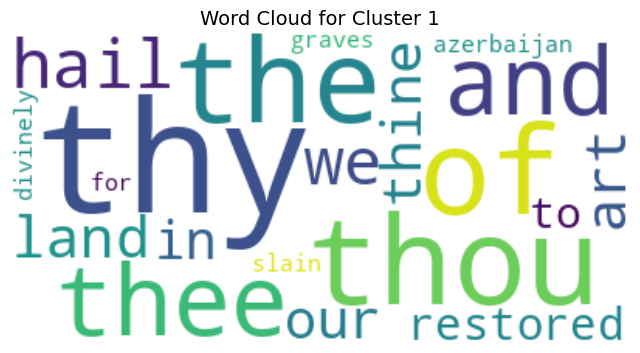

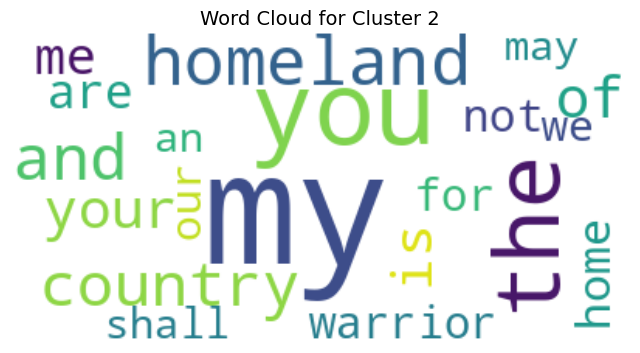

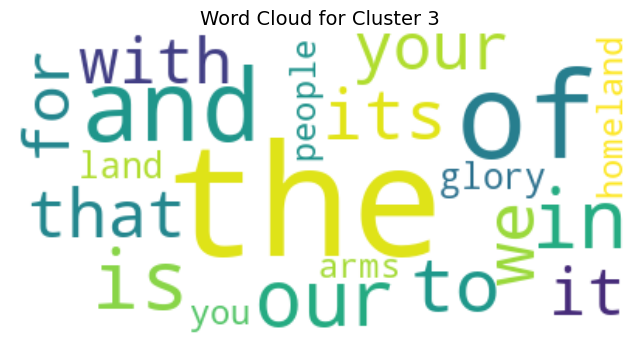

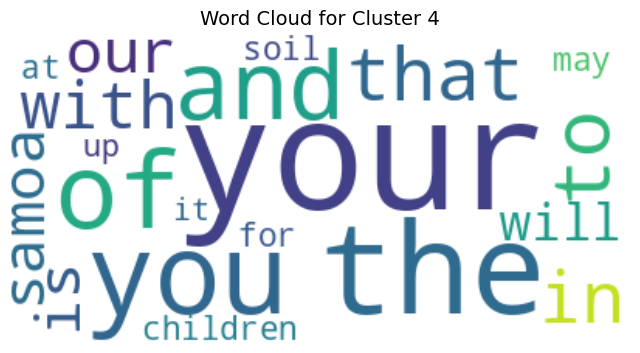

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generateWordClouds(dfs):
    for i, df in enumerate(dfs):
        # Convert dataframe to dictionary for WordCloud
        words_dict = df.set_index('features')['score'].to_dict()

        # Generate word cloud
        wordcloud = WordCloud(max_font_size=100, background_color='white')
        wordcloud.generate_from_frequencies(words_dict)

        # Plot word cloud
        plt.figure(figsize=(8, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Word Cloud for Cluster {}'.format(i), fontsize=14)
        plt.axis('off')
        plt.show()

# Assuming the rest of the code remains the same

# Generate word clouds for each cluster
generateWordClouds(dfs)
